# T4 Spectral analsyis of analog signals

## Fast Fourier transform of a constructed signal

Let us reconsider the example from class. The signal is composed of two sine waves, each featuring a different frequency. Furthermore, noise is added to the signal. 

The code below performs a FFT on the signal and displays the orignal signal without noise, the signal with noise and the FFT. Let's go step by step through the code and understand it. 

/home/mgraupe/.virtualenvs/locorungs/lib/python3.6/site-packages/ipykernel_launcher.py:22: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


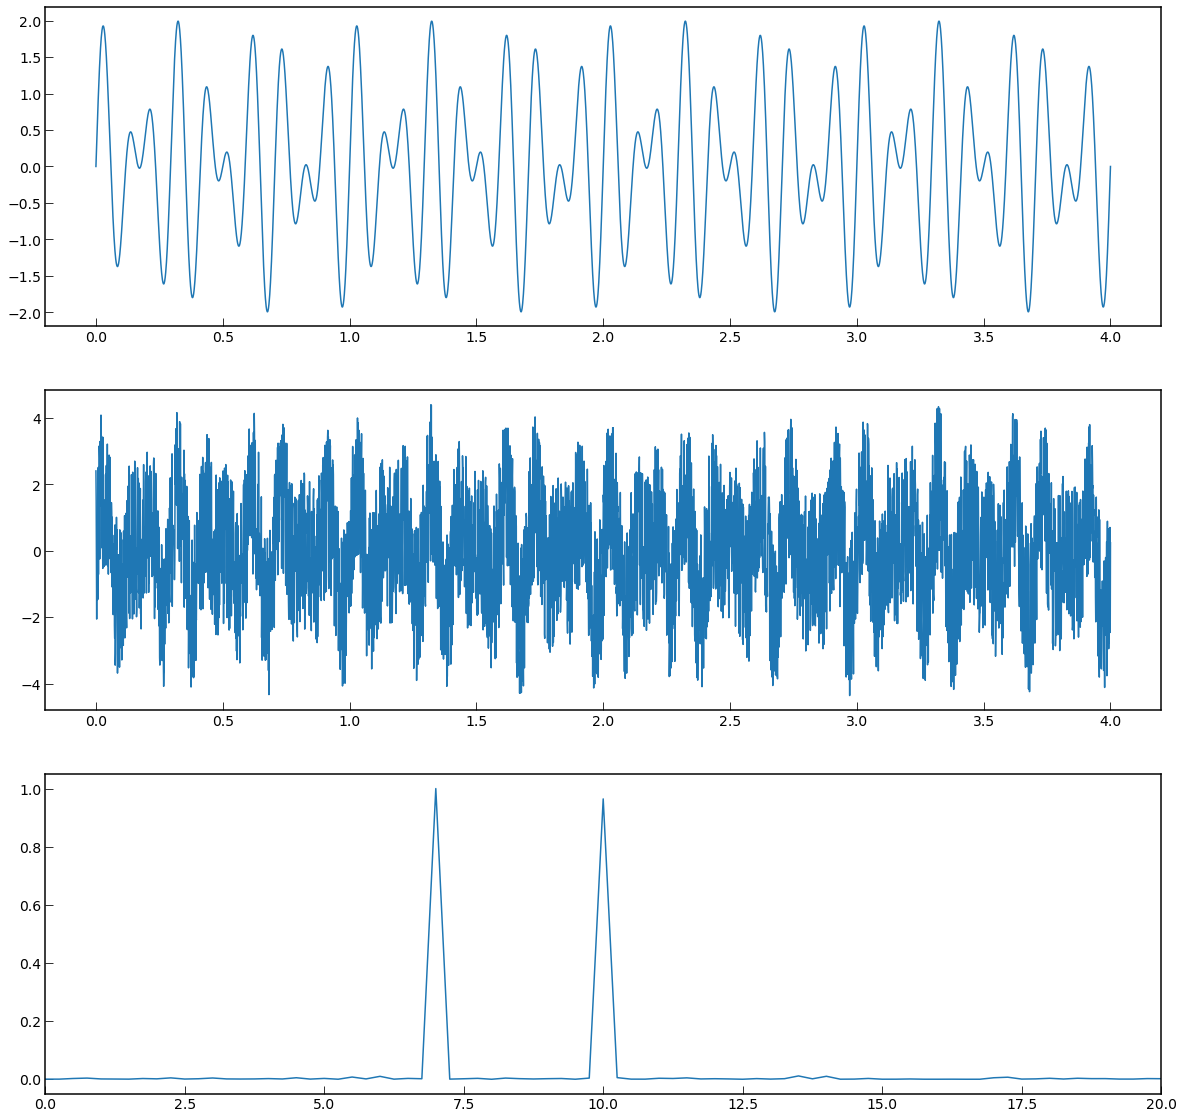

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# constructing the signal ######################
fs = 1000     #1 
duration = 4  #2 
freq1 = 10    #3 
freq2 = 7     #4 


t = np.linspace(0,duration,fs*duration)  #5
y1 = np.sin(2.*np.pi*t*freq1)            #6
y2 = np.sin(2.*np.pi*t*freq2)            #7
y3 = y1 + y2                             #8
y3noise = y3 + 5*(np.random.rand(len(t))-0.5) #9


# performing FFT on signal ######################
nyquist = fs/2.                                  #10
fSpaceSignal = np.fft.fft(y3noise)               #11
fBase = np.linspace(0,nyquist,np.floor(len(y3noise)/2)+1) #12
halfTheSignal = fSpaceSignal[:len(fBase)]        #13
complexConjugate = np.conj(halfTheSignal)        #14
powe = halfTheSignal*complexConjugate            #15

# plotting results ##############################
fig = plt.figure(figsize=(20,20))                #16
ax0 = fig.add_subplot(311)                     #17
ax0.plot(t,y3)                                   #18

#
ax1 = fig.add_subplot(312)                     #19
ax1.plot(t,y3noise)                              #20
                        
ax2 = fig.add_subplot(313)                     #21

ax2.plot(fBase,powe/max(powe))                   #22
ax2.set_xlim([0,20])                             #23
 
plt.show()                                       #24



#### Exploring the FFT example

Let's modify the code to obtain some deeper insights into what is going on. 

1. How does the pure output of the `np.fft.fft()` function look like? 
2. What happens to the signal and the FFT if you increase the noise amplitude to 20 instead of 5? 
3. Add a third sinusoidal function to the signal. This function should have the frequency of 0.5 Hz. 
4. What happens to the signal and the FFT if a constant term is added to the signal? 

1.  The ouput of the `np.fft.ftt()` is an array of length 4000 (4000 elements as the signal itself). Each element is a complex number with a real and a imaginary part. The imaginary part in python is denoted by `j`. 

In [2]:
print(fSpaceSignal,len(fSpaceSignal))

[-99.1905076  +0.j          86.53446968+28.86239452j
  14.65569796 -2.97597331j ...  -8.05752687+37.0191411j
  14.65569796 +2.97597331j  86.53446968-28.86239452j] 4000


2. Increasing the ampliude of the added noise to 20 hides the sine waves in the time domain of the signal even more. It is hard to see any rythmicity in the signal by eye. 
However, the peaks at 7 and 10 Hz in the frequency are reliably extracted from the signal. Nonetheless, the added noise leads to power in other frequency bands besides 7 and 10 Hz even though the amplitude of the power there are small compared to the contributions at 7 and 10 Hz. 

/home/mgraupe/.virtualenvs/locorungs/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  # This is added back by InteractiveShellApp.init_path()


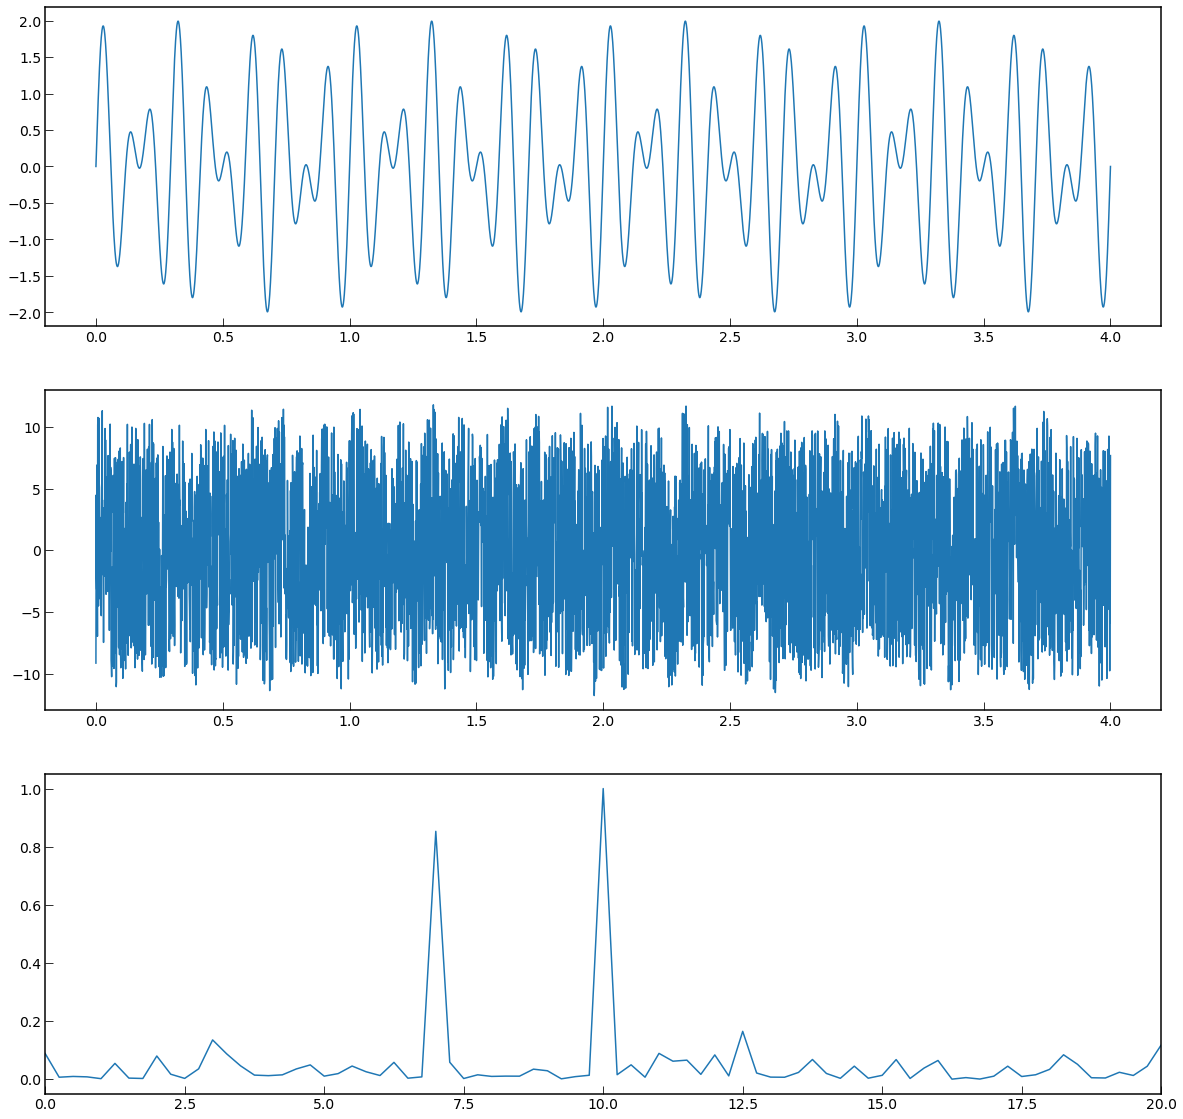

In [17]:
t = np.linspace(0,duration,fs*duration)  #5
y1 = np.sin(2.*np.pi*t*freq1)            #6
y2 = np.sin(2.*np.pi*t*freq2)          #7
y3 = y1 + y2                             #8
y3noise = y3 + 20*(np.random.rand(len(t))-0.5) #9


# performing FFT on signal ######################
nyquist = fs/2.                                  #10
fSpaceSignal = np.fft.fft(y3noise)               #11
fBase = np.linspace(0,nyquist,np.floor(len(y3noise)/2)+1) #12
halfTheSignal = fSpaceSignal[:len(fBase)]        #13
complexConjugate = np.conj(halfTheSignal)        #14
powe = halfTheSignal*complexConjugate            #15

# plotting results ##############################
fig = plt.figure(figsize=(20,20))                #16
ax0 = fig.add_subplot(3,1,1)                     #17
ax0.plot(t,y3)                                   #18

#
ax1 = fig.add_subplot(3,1,2)                     #19
ax1.plot(t,y3noise)                              #20
                        
ax2 = fig.add_subplot(3,1,3)                     #21

ax2.plot(fBase,powe/max(powe))                   #22
ax2.set_xlim([0,20])                             #23
 
plt.show()                                       #24



3. Adding a third sinusoidal curve follows the same scheme as for the orginal two sine functions. The parameter determining the frequency (here `freq4`) has to be set to 0.5. 
In turn, an additional peak at 0.5 shows up in the power vs. frequency plot. 

/home/mgraupe/.virtualenvs/locorungs/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  


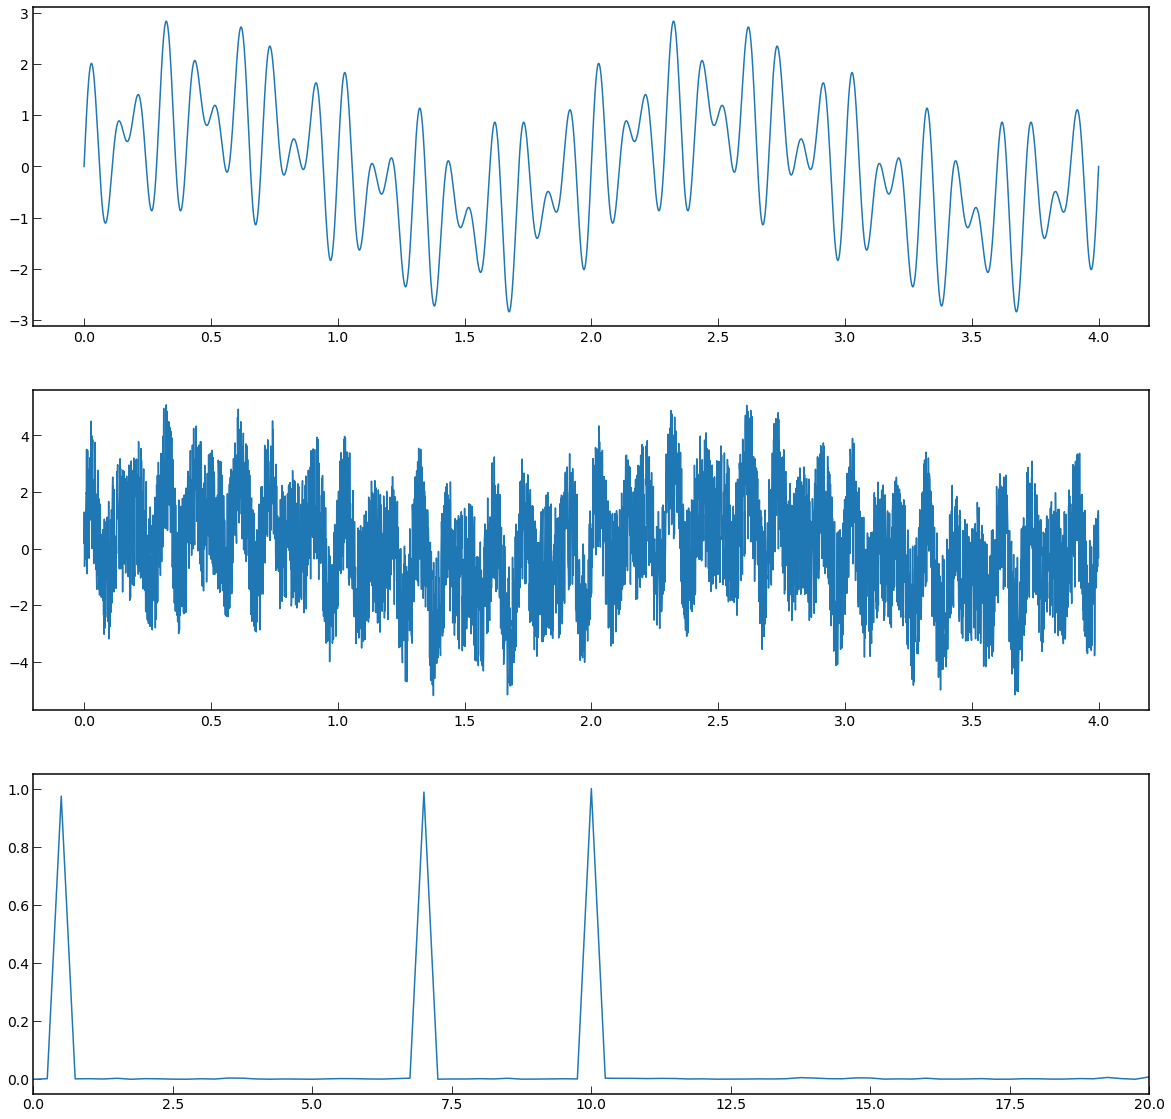

In [4]:
freq4 = 0.5

t = np.linspace(0,duration,fs*duration)  #5
y1 = np.sin(2.*np.pi*t*freq1)            #6
y2 = np.sin(2.*np.pi*t*freq2)          #7
y4 = np.sin(2.*np.pi*t*freq4)            #7
y3 = y1 + y2 + y4                        #8
y3noise = y3 + 5*(np.random.rand(len(t))-0.5) #9


# performing FFT on signal ######################
nyquist = fs/2.                                  #10
fSpaceSignal = np.fft.fft(y3noise)               #11
fBase = np.linspace(0,nyquist,np.floor(len(y3noise)/2)+1) #12
halfTheSignal = fSpaceSignal[:len(fBase)]        #13
complexConjugate = np.conj(halfTheSignal)        #14
powe = halfTheSignal*complexConjugate            #15

# plotting results ##############################
fig = plt.figure(figsize=(20,20))                #16
ax0 = fig.add_subplot(3,1,1)                     #17
ax0.plot(t,y3)                                   #18

#
ax1 = fig.add_subplot(3,1,2)                     #19
ax1.plot(t,y3noise)                              #20
                        
ax2 = fig.add_subplot(3,1,3)                     #21

ax2.plot(fBase,powe/max(powe))                   #22
ax2.set_xlim([0,20])                             #23
 
plt.show()                                       #24



4. Adding a constant term is equivalent to adding a very, very slow (frequency limit -> 0 Hz) oscillation to the signal. In turn, the constant term yields a contribution at 0 frequency in the power vs. frequency plot. Note that the magnitude of the contribution at 0 frequency depends on the amplitude of the constant term. The constant term is 0.5 in the example below which makes the contribution equal in amplitude as the two sine waves at 7 and 10 Hz.

/home/mgraupe/.virtualenvs/locorungs/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  # This is added back by InteractiveShellApp.init_path()


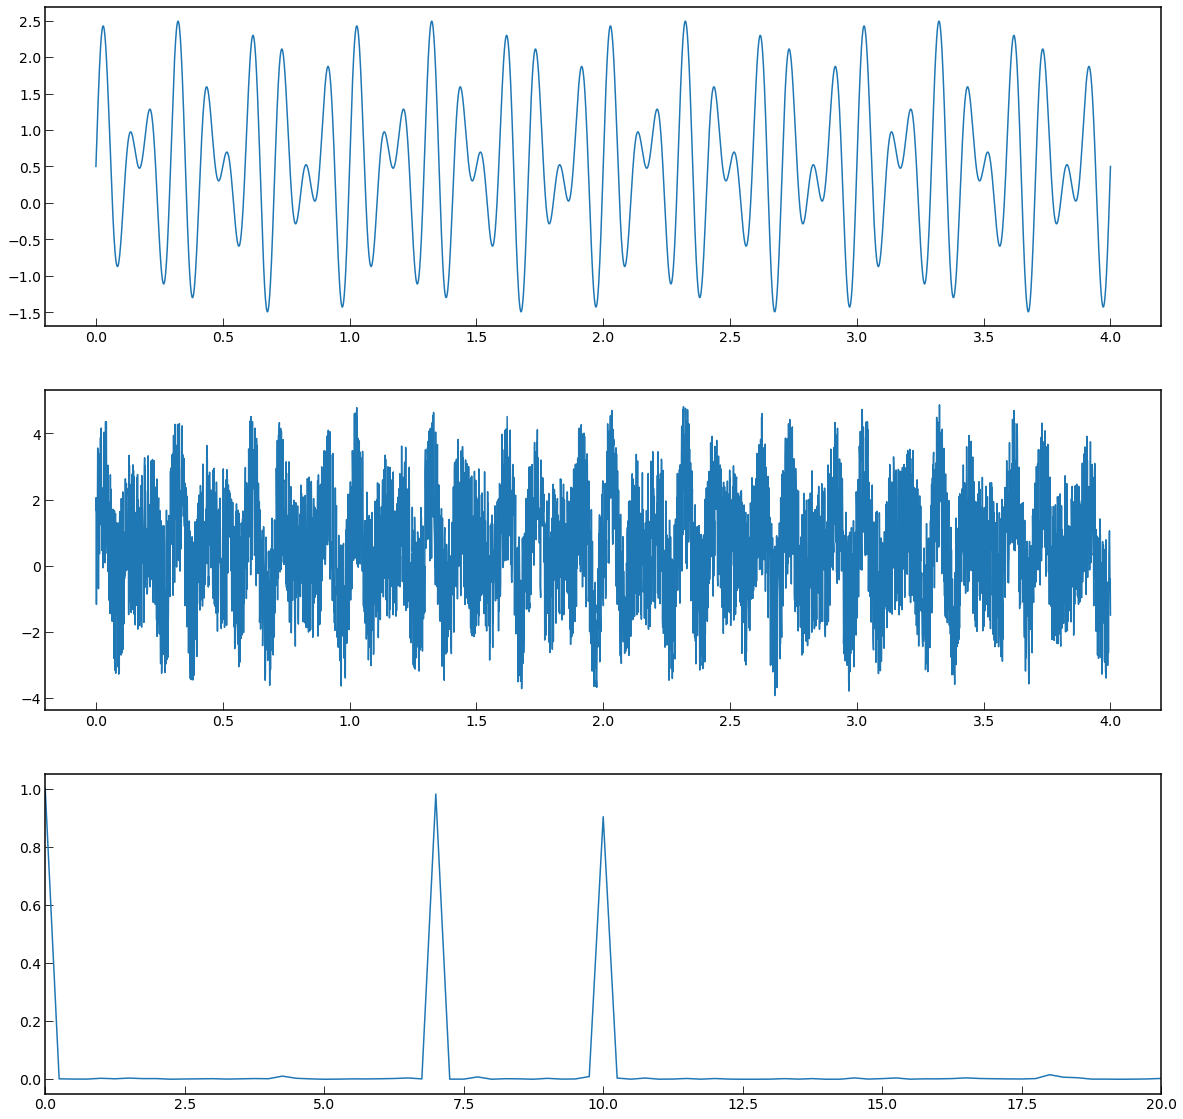

In [5]:
t = np.linspace(0,duration,fs*duration)  #5
y1 = np.sin(2.*np.pi*t*freq1)            #6
y2 = np.sin(2.*np.pi*t*freq2)          #7
y3 = y1 + y2 + 0.5                      #8
y3noise2 = y3 + 5*(np.random.rand(len(t))-0.5) #9


# performing FFT on signal ######################
nyquist = fs/2.                                  #10
fSpaceSignal = np.fft.fft(y3noise)               #11
fBase = np.linspace(0,nyquist,np.floor(len(y3noise)/2)+1) #12
halfTheSignal = fSpaceSignal[:len(fBase)]        #13
complexConjugate = np.conj(halfTheSignal)        #14
powe2 = halfTheSignal*complexConjugate            #15

# plotting results ##############################
fig = plt.figure(figsize=(20,20))                #16
ax0 = fig.add_subplot(3,1,1)                     #17
ax0.plot(t,y3)                                   #18

#
ax1 = fig.add_subplot(3,1,2)                     #19
ax1.plot(t,y3noise2)                              #20
ax1.plot(t,y3noise)     
    
ax2 = fig.add_subplot(3,1,3)                     #21

ax2.plot(fBase,powe/max(powe))                   #22
ax2.set_xlim([0,20])                             #23
 
plt.show()                                       #24


<div class="alert alert-info">
<em>Advanced assignment :</em>
    
1. What happens in the time and frequency domain if one of the oscillations is described by a cosine   function, instead of the sin function? 

</div>

/home/mgraupe/.virtualenvs/locorungs/lib/python3.6/site-packages/ipykernel_launcher.py:22: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


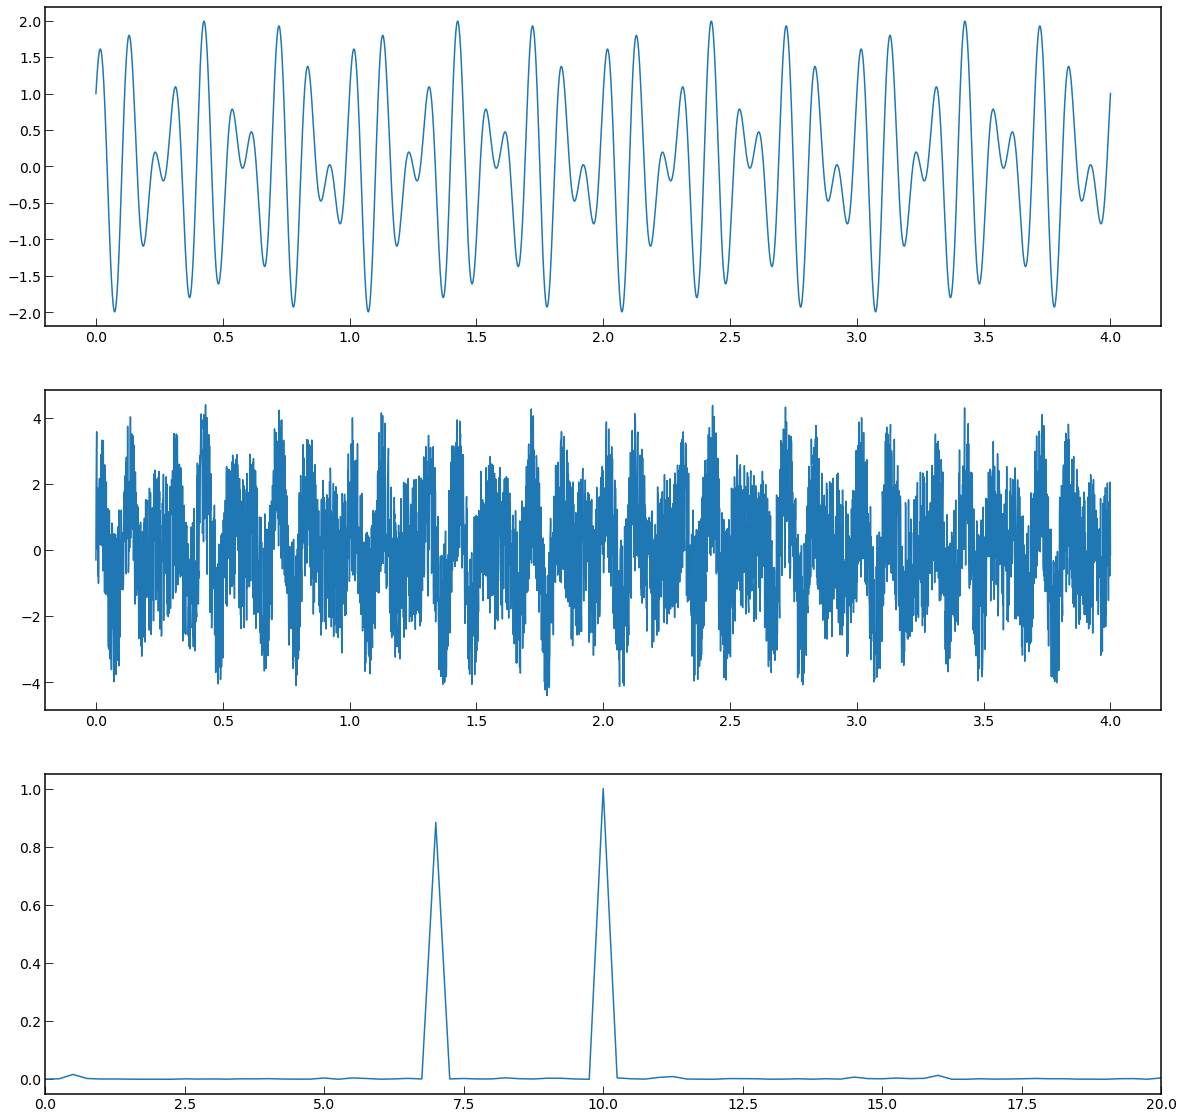

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# constructing the signal ######################
fs = 1000     #1 
duration = 4  #2 
freq1 = 10    #3 
freq2 = 7     #4 


t = np.linspace(0,duration,fs*duration)  #5
y1 = np.sin(2.*np.pi*t*freq1)            #6
y2 = np.cos(2.*np.pi*t*freq2)            #7
y3 = y1 + y2                             #8
y3noise = y3 + 5*(np.random.rand(len(t))-0.5) #9


# performing FFT on signal ######################
nyquist = fs/2.                                  #10
fSpaceSignal = np.fft.fft(y3noise)               #11
fBase = np.linspace(0,nyquist,np.floor(len(y3noise)/2)+1) #12
halfTheSignal = fSpaceSignal[:len(fBase)]        #13
complexConjugate = np.conj(halfTheSignal)        #14
powe = halfTheSignal*complexConjugate            #15

# plotting results ##############################
fig = plt.figure(figsize=(20,20))                #16
ax0 = fig.add_subplot(311)                     #17
ax0.plot(t,y3)                                   #18

#
ax1 = fig.add_subplot(312)                     #19
ax1.plot(t,y3noise)                              #20
                        
ax2 = fig.add_subplot(313)                     #21

ax2.plot(fBase,powe/max(powe))                   #22
ax2.set_xlim([0,20])                             #23
 
plt.show()                                       #24

Using a cosine instead of a sin function (here for y2) simply shifts the phase of one of the osciallations but it does not change the frequency content. In turn, the power spectrum is not affected and looks similar to the case with the sin function. However, by using the FFT one can in fact also extract the phase of an osciallation (we have not discussed this in detail in class). In the case where one osciallation is decribed by the sin function and the second oscillation with the cosine function, we would expect to see a phase shift of Pi/2 between the two revealed by the FFT. 

## Calculating the spectrogram of a signal

Similar to what we have seen in class, we construct a chirp signal using the `scipy.signal.chirp()` function and compute the spectrogram of the chrip. Remember that the spectrogram resloves the change in frequency content of the signal over time. To calculate the spectrogram, we will use the `scipy.signal.spectrogram()` function. 

The code below computes the spectrogram of the signal and displays the signal and the spectrogram. Let's go step by step through the code and understand it.

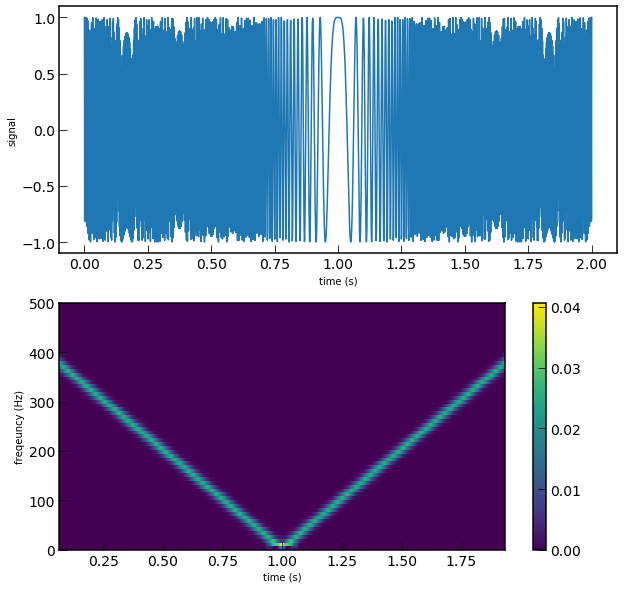

In [27]:
import scipy.signal as sg


# constructing the signal #################
fs = 1000                          #1
time = np.linspace(0,2,fs*2)       #2
y=sg.chirp(time,400,1,0,'linear')  #3


# computing the spetrogram ################
windLength = 128              #4
overl = windLength-1          #5
wind=np.hanning(windLength)   #6
#wind=np.kaiser(windLength,0) #7
f, tt, Sxx =sg.spectrogram(y,fs,wind,len(wind),overl) #8

# producing the figure ################
fig=plt.figure(figsize=(10,10))  #9

ax0 = plt.subplot(2,1,1)          #10
ax0.plot(time,y)                  #11
ax0.set_xlabel('time (s)')        #12
ax0.set_ylabel('signal')          #13

ax1 = plt.subplot(2,1,2)          #14


im = ax1.pcolormesh(tt,f,Sxx)     #15
fig.colorbar(im, ax=ax1)          #16  
ax1.set_xlabel('time (s)')         #17
ax1.set_ylabel('freqeuncy (Hz)')            #18

plt.show()                        #19

The chirp created by the function `scipy.signal.chrip` creates an osciallation which starts at 400 Hz, linearly decrases to 0 Hz at 1 sec, and linearly increases to 400 Hz at 2 sec. This behavior is evident in the spectrogram but not so easy to discern from the signal in the time domain. 

<div class="alert alert-info">
<em>Advanced assignment :</em>
    
1. Play with the window size of the spectrogram calculation? What happens if the window size is descreased or increased? Why?  

2. Contruct different types of chrips and inspect the respective spectrograms : 
   - linear decreasing frequency from 400 Hz at 0 s to 0 at 2 s 
   - quadradic increase of frequency from 10 Hz at 0 to 500 Hz at 2 s
   - hyperbolic decrease of frequency from 500 Hz at 0 to 10 Hz at 2

</div>

Regarding assignement 1. : The window size determines the resolution of the frequency content. 
 - Larger windows contain more frequency components of the the changing signal. In turn, the spread along the frequency axis in the power spectrum is larger and the amplitude of each frequency component is smaller. 
 - It's more difficult to compute the frequency content for smaller windows since the signal snippet is short. In turn, the frequency estimation becomes less reliable and the resolution along the frequency axis also increases. 
 
Together that means there is a sweet spot of window length which depends on the sampling rate and the speed at which the frequency changes in the signal. 

Regarding assignement 2. :

-> linear decreasing frequency from 400 Hz at 0 s to 0 at 2 s

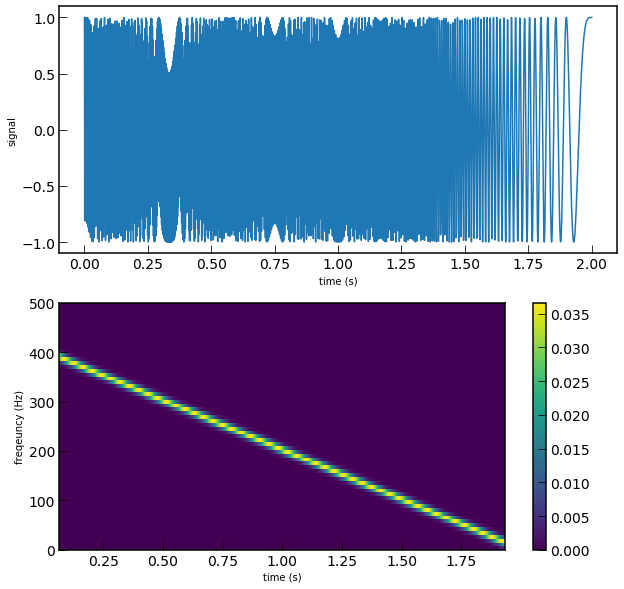

In [28]:
# constructing the signal #################
fs = 1000                          #1
time = np.linspace(0,2,fs*2)       #2
y=sg.chirp(time,400,2,0,'linear')  #3


# computing the spetrogram ################
windLength = 128              #4
overl = windLength-1          #5
wind=np.hanning(windLength)   #6
#wind=np.kaiser(windLength,0) #7
f, tt, Sxx =sg.spectrogram(y,fs,wind,len(wind),overl) #8

# producing the figure ################
fig=plt.figure(figsize=(10,10))  #9

ax0 = plt.subplot(2,1,1)          #10
ax0.plot(time,y)                  #11
ax0.set_xlabel('time (s)')        #12
ax0.set_ylabel('signal')          #13

ax1 = plt.subplot(2,1,2)          #14


im = ax1.pcolormesh(tt,f,Sxx)     #15
fig.colorbar(im, ax=ax1)          #16  
ax1.set_xlabel('time (s)')         #17
ax1.set_ylabel('freqeuncy (Hz)')            #18

plt.show()                        #19

-> quadradic increase of frequency from 10 Hz at 0 to 500 Hz at 2 s

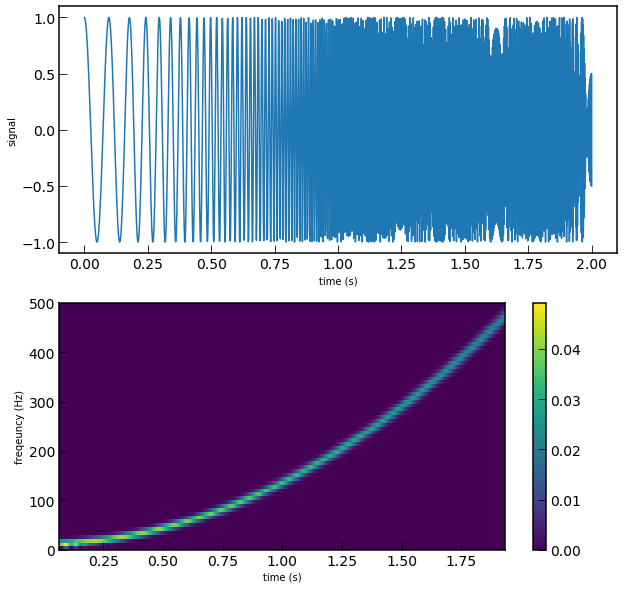

In [29]:
# constructing the signal #################
fs = 1000                          #1
time = np.linspace(0,2,fs*2)       #2
y=sg.chirp(time,10,2,500,'quadratic')  #3


# computing the spetrogram ################
windLength = 128              #4
overl = windLength-1          #5
wind=np.hanning(windLength)   #6
#wind=np.kaiser(windLength,0) #7
f, tt, Sxx =sg.spectrogram(y,fs,wind,len(wind),overl) #8

# producing the figure ################
fig=plt.figure(figsize=(10,10))  #9

ax0 = plt.subplot(2,1,1)          #10
ax0.plot(time,y)                  #11
ax0.set_xlabel('time (s)')        #12
ax0.set_ylabel('signal')          #13

ax1 = plt.subplot(2,1,2)          #14


im = ax1.pcolormesh(tt,f,Sxx)     #15
fig.colorbar(im, ax=ax1)          #16  
ax1.set_xlabel('time (s)')         #17
ax1.set_ylabel('freqeuncy (Hz)')            #18

plt.show()                        #19

-> hyperbolic decrease of frequency from 500 Hz at 0 to 10 Hz at 2

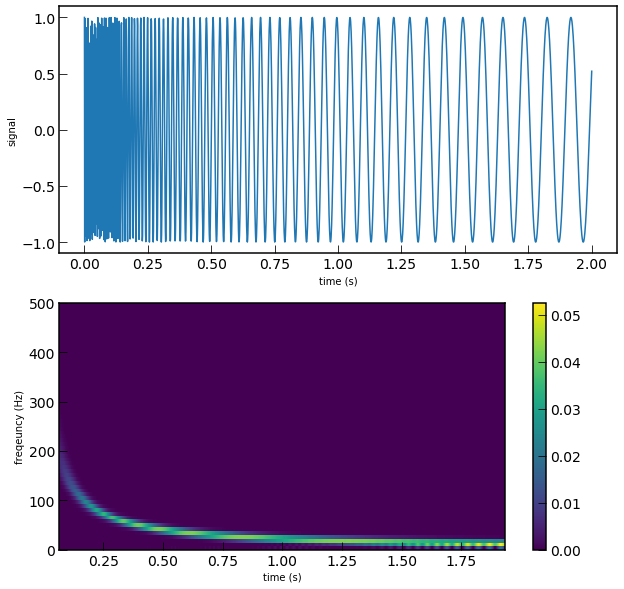

In [30]:
# constructing the signal #################
fs = 1000                          #1
time = np.linspace(0,2,fs*2)       #2
y=sg.chirp(time,500,2,10,'hyperbolic')  #3


# computing the spetrogram ################
windLength = 128              #4
overl = windLength-1          #5
wind=np.hanning(windLength)   #6
#wind=np.kaiser(windLength,0) #7
f, tt, Sxx =sg.spectrogram(y,fs,wind,len(wind),overl) #8

# producing the figure ################
fig=plt.figure(figsize=(10,10))  #9

ax0 = plt.subplot(2,1,1)          #10
ax0.plot(time,y)                  #11
ax0.set_xlabel('time (s)')        #12
ax0.set_ylabel('signal')          #13

ax1 = plt.subplot(2,1,2)          #14


im = ax1.pcolormesh(tt,f,Sxx)     #15
fig.colorbar(im, ax=ax1)          #16  
ax1.set_xlabel('time (s)')         #17
ax1.set_ylabel('freqeuncy (Hz)')            #18

plt.show()                        #19

## The end